In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
##original_dataset

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv(r"C:\Users\RAHUL\Music\dataTraining_test.csv")

In [29]:
df.head()

,tree_dbh,curb_loc,health,steward,sidewalk,user_type,root_stone,root_other,trunk_wire,trnk_other,brch_light,brch_other,latitude,longitude
0,4,OnCurb,Good,None,NoDamage,TreesCount Staff,No,No,No,No,No,No,40.746433,-73.760804
1,11,OnCurb,Good,None,NoDamage,TreesCount Staff,No,No,No,No,No,No,40.823422,-73.952670
2,10,OnCurb,Fair,None,Damage,TreesCount Staff,Yes,No,No,No,No,No,40.740724,-73.883406
3,10,OnCurb,Good,None,Damage,Volunteer,Yes,No,No,Yes,No,No,40.697815,-73.947001
4,7,OnCurb,Good,None,Damage,TreesCount Staff,No,No,No,No,Yes,No,40.540792,-74.151754


In [30]:
data =pd.get_dummies(data=df, columns=['curb_loc', 'steward','sidewalk','user_type'])

In [31]:
data

,tree_dbh,health,root_stone,root_other,trunk_wire,trnk_other,brch_light,brch_other,latitude,longitude,...,curb_loc_OnCurb,steward_1or2,steward_3or4,steward_4orMore,steward_None,sidewalk_Damage,sidewalk_NoDamage,user_type_NYC Parks Staff,user_type_TreesCount Staff,user_type_Volunteer
0,4,Good,No,No,No,No,No,No,40.746433,-73.760804,...,1,0,0,0,1,0,1,0,1,0
1,11,Good,No,No,No,No,No,No,40.823422,-73.952670,...,1,0,0,0,1,0,1,0,1,0
2,10,Fair,Yes,No,No,No,No,No,40.740724,-73.883406,...,1,0,0,0,1,1,0,0,1,0
3,10,Good,Yes,No,No,Yes,No,No,40.697815,-73.947001,...,1,0,0,0,1,1,0,0,0,1
4,7,Good,No,No,No,No,Yes,No,40.540792,-74.151754,...,1,0,0,0,1,1,0,0,1,0
5,16,Good,No,No,No,No,No,No,40.657752,-73.835572,...,1,0,0,0,1,1,0,1,0,0
6,25,Good,No,No,No,No,No,No,40.657926,-73.911578,...,1,0,0,0,1,0,1,1,0,0
7,9,Good,Yes,No,No,No,Yes,No,40.620203,-73.943728,...,1,0,0,0,1,1,0,0,0,1
8,4,Good,No,No,No,No,No,No,40.711129,-73.899263,...,1,1,0,0,0,0,1,0,1,0
9,3,Good,No,No,No,No,No,No,40.731723,-73.945785,...,1,0,0,0,1,0,1,0,0,1


In [32]:
health = {'Good': 0,'Fair': 1 , 'Poor' : 2} 

In [33]:
data.health = [health[item] for item in data.health] 
print(data) 

        tree_dbh  health root_stone root_other trunk_wire trnk_other  \
0              4       0         No         No         No         No   
1             11       0         No         No         No         No   
2             10       1        Yes         No         No         No   
3             10       0        Yes         No         No        Yes   
4              7       0         No         No         No         No   
5             16       0         No         No         No         No   
6             25       0         No         No         No         No   
7              9       0        Yes         No         No         No   
8              4       0         No         No         No         No   
9              3       0         No         No         No         No   
10             5       0        Yes         No         No         No   
11            11       0        Yes         No         No        Yes   
12             4       0         No         No         No       

In [34]:
root_stone ={'Yes': 1,'No': 0}
root_other ={'Yes': 1,'No': 0}
trunk_wire ={'Yes': 1,'No': 0}
trnk_other ={'Yes': 1,'No': 0}
brch_light ={'Yes': 1,'No': 0}
brch_other ={'Yes': 1,'No': 0}

In [35]:
data.root_stone = [root_stone[item] for item in data.root_stone] 
data.root_other = [root_other[item] for item in data.root_other] 
data.trunk_wire = [trunk_wire[item] for item in data.trunk_wire] 
data.trnk_other = [trnk_other[item] for item in data.trnk_other] 
data.brch_light = [brch_light[item] for item in data.brch_light] 
data.brch_other = [brch_other[item] for item in data.brch_other] 

In [36]:
data = data.dropna()

In [37]:
cols=list(data.columns)

In [38]:
cols.remove('health')

In [39]:
X = data[cols]

In [40]:
y = data.health

In [41]:
print(len(y),len(X))

456520 456520


In [42]:
y = label_binarize(y, classes=[0,1,2])
n_classes = 3

#splitting training and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=0)


In [43]:
# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)
accuracy = clf.score(X_test,y_test)

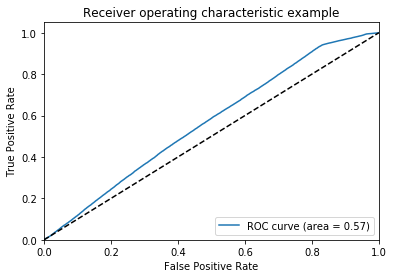

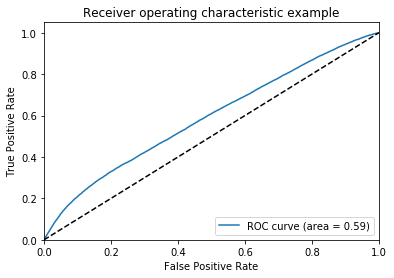

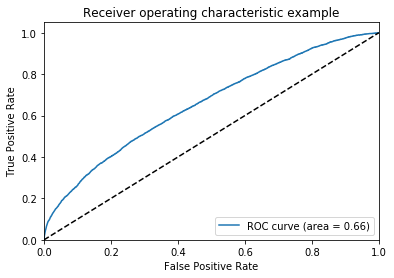

In [25]:
# Compute ROC curve and ROC area 
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
###downsampling#####

In [ ]:
df = pd.read_csv(r"C:\Users\RAHUL\Downloads\dataDownTraining.csv")

In [ ]:
df.head()

In [ ]:
data =pd.get_dummies(data=df, columns=['curb_loc', 'steward','sidewalk','user_type'])

In [ ]:
data

In [ ]:
health = {'Good': 0,'Fair': 1 , 'Poor' : 2} 

In [ ]:
data.health = [health[item] for item in data.health] 
print(data) 

In [ ]:
root_stone ={'Yes': 1,'No': 0}
root_other ={'Yes': 1,'No': 0}
trunk_wire ={'Yes': 1,'No': 0}
trnk_other ={'Yes': 1,'No': 0}
brch_light ={'Yes': 1,'No': 0}
brch_other ={'Yes': 1,'No': 0}

In [ ]:
data.root_stone = [root_stone[item] for item in data.root_stone] 
data.root_other = [root_other[item] for item in data.root_other] 
data.trunk_wire = [trunk_wire[item] for item in data.trunk_wire] 
data.trnk_other = [trnk_other[item] for item in data.trnk_other] 
data.brch_light = [brch_light[item] for item in data.brch_light] 
data.brch_other = [brch_other[item] for item in data.brch_other] 

In [ ]:
data = data.dropna()

In [ ]:
cols=list(data.columns)

In [ ]:
cols.remove('health')

In [ ]:
X = data[cols]

In [ ]:
y = data.health

In [ ]:
print(len(y),len(X))

In [ ]:
y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# splitting training and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=0)


In [ ]:
# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)
accuracy = clf.score(X_test,y_test)

In [ ]:
###Upsampling###

In [ ]:
df = pd.read_csv(r"C:\Users\RAHUL\Downloads\dataUpTraining.csv")

In [ ]:
df.head()

In [ ]:
data =pd.get_dummies(data=df, columns=['curb_loc', 'steward','sidewalk','user_type'])

In [ ]:
data

In [ ]:
health = {'Good': 0,'Fair': 1 , 'Poor' : 2} 

In [ ]:
data.health = [health[item] for item in data.health] 
print(data) 

In [ ]:
root_stone ={'Yes': 1,'No': 0}
root_other ={'Yes': 1,'No': 0}
trunk_wire ={'Yes': 1,'No': 0}
trnk_other ={'Yes': 1,'No': 0}
brch_light ={'Yes': 1,'No': 0}
brch_other ={'Yes': 1,'No': 0}

In [ ]:
data.root_stone = [root_stone[item] for item in data.root_stone] 
data.root_other = [root_other[item] for item in data.root_other] 
data.trunk_wire = [trunk_wire[item] for item in data.trunk_wire] 
data.trnk_other = [trnk_other[item] for item in data.trnk_other] 
data.brch_light = [brch_light[item] for item in data.brch_light] 
data.brch_other = [brch_other[item] for item in data.brch_other] 

In [ ]:
data = data.dropna()

In [ ]:
cols=list(data.columns)

In [ ]:
cols.remove('health')

In [ ]:
X = data[cols]

In [ ]:
y = data.health

In [ ]:
print(len(y),len(X))

In [ ]:
y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# splitting training and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=0)


In [ ]:
# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)
accuracy = clf.score(X_test,y_test)